# 12 Diffusion kosmischer Strahlung

Betrachten  Sie  ein  vereinfachtes  Modell  der  kosmischen  Strahlung  (CR)  unserer  Galaxie, welche als Scheibe von einer Höhe $H$ und einem Radius $R$, mit $H\ll R$ genähert werden kann. Diffusionsprozesse finden hauptsächlich senkrecht zur galaktischen Scheibe statt, und hängen daher näherungweise nur von der senkrechten Koordinate $z$ ab. Die Teilchendichte in der CR erfülle die Differentialgleichung,

$$ \frac{\partial n}{\partial t}-D\frac{\partial^2 n}{\partial^2 z} = Q_0\delta(z)\delta(t)$$

#### (a) Zeigen Sie, dass die Normalverteilung eine Lösung dieser Gleichung ist.

$$ n(z,t) = \frac{n_0}{\sqrt{2\pi\sigma(t)^2}} \exp\left( -\frac{1}{2} (\frac{z}{\sigma(t)})^2 \right)$$ 

Löse zunächst den homogenen Teil der Lsg, bzw. für $z\neq 0, t\neq0, z\neq\sigma(t)$:

$
\begin{aligned}
\hspace{18cm}
\frac{\partial n}{\partial t} - D\cdot\frac{\partial^2 n}{\partial z^2} &= 0 \\
\frac{n_0}{\sqrt{2\pi}}\frac{\sigma'}{\sigma^4}(z^2-\sigma^2)e^{-\frac{1}{2}(\frac{z}{\sigma})^2} - D\cdot\frac{n_0}{\sqrt{2\pi}}\frac{1}{\sigma^5}(z^2-\sigma^2)e^{-\frac{1}{2}(\frac{z}{\sigma})^2} &= 0\qquad|\;:\frac{n_0}{\sqrt{2\pi}}\frac{1}{\sigma^5}(z^2-\sigma^2)e^{-\frac{1}{2}(\frac{z}{\sigma})^2}\\
\sigma'\sigma - D &= 0 \\[5pt]
\frac{\mathrm{d}\sigma}{\mathrm{d}t}\sigma &= D \\[7pt]
\int\,\mathrm{d}\sigma\;\sigma &= \int\,\mathrm{d}t\,D \\
\frac{1}{2}\sigma^2 &= Dt \\
\sigma(t) &= \sqrt{2D\cdot t}
\end{aligned}
$

$n_0 =$ Normierung der Gaußfunktion, also Teilchenzahl zu Beginn also $\;=Q_0$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
MovieWriter ffmpeg unavailable; using Pillow instead.


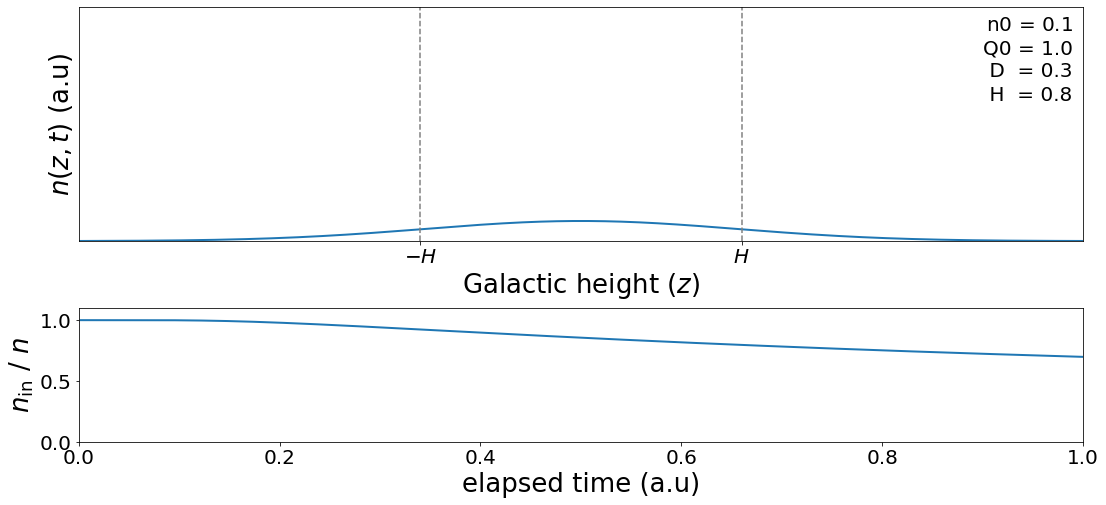

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize=26)

fig = plt.figure()

ax1 = plt.subplot2grid((5, 1), (0, 0),rowspan=3)
ax2 = plt.subplot2grid((5, 1), (3, 0),rowspan=2)
plt.subplots_adjust(hspace=2)

def gaussian(z,t,N,Q,D):
    sigma = lambda t: Q*np.sqrt(2*D*t)
    return N/(np.sqrt(2*np.pi*sigma(t)**2)) * np.exp(-0.5*(z/sigma(t))**2)

H = 0.8
nframes = 500
n0, q, d = 0.1,1,0.3
z = np.arange(-10, 10, 0.01)

diffusion, = ax1.plot(z, gaussian(z,0.1,n0,q,d),lw=2)
time_label = ax1.annotate(f"t = 0.1",xy=(-2.55,0.54),weight="bold")
contained_line, = ax2.plot([0,1],[1,0],lw=2)
contained_mask = np.abs(z) < H
ratio_contained,t = [],[]

def animate(i):

    # calculate the new distribution
    y_data = gaussian(z,(i+1)/nframes,n0,q,d)
    
    ratio_contained.append(np.sum(y_data[contained_mask])/np.sum(y_data))
    t.append((i+1)/nframes)
    
    # update the plots
    contained_line.set_data(t,ratio_contained)
    time_label.set_text(f"t = {(i+1)/nframes}")
    diffusion.set_ydata(y_data)    
     
    return diffusion, time_label, contained_line

# set up other stuff for the plot
ax1.axvline(-H,ls="--",c="gray")
ax1.axvline(H,ls="--",c="gray")
ax1.set_ylim(0,0.6)
ax1.set_xlim(-2.5,2.5)
ax1.set_yticks([],[])
ax1.set_xticks([-H,H])
ax1.set_xticklabels([r"$-H$",r"$H$"])
ax1.set_xlabel(r"Galactic height $(z)$")
ax1.set_ylabel(r"$n(z,t)$ (a.u)")

ax1.annotate(r"$\,$n0 = 0.1",(2,0.54))
ax1.annotate(f"Q0 = {q:.1f}",(2,0.48))
ax1.annotate(f" D  = {d}",(2,0.42))
ax1.annotate(f" H  = {H}",(2,0.36))

ax2.set_ylim(0,1.1)
ax2.set_xlim(0,1)
ax2.set_ylabel(r"$n_\mathrm{in}$ / $n$")
ax2.set_xlabel("elapsed time (a.u)")

# do the animations
ani = animation.FuncAnimation(fig, animate, interval=35, blit=True, save_count=nframes)
ani.save("diffusion.gif")

In [2]:
# from IPython.display import Image
# Image(filename="diffusion.gif")

#### (b) Berechnen Sie den Anteil an Teilchen, die nach $t_0$ noch in der Galaxie vorhanden ist,

$$ p_n = \int\limits_{-H}^{H}\,\mathrm{d}z\,n(z,t_0)$$ 

Nehmen Sie an, dass $λ=3·10^{−15}\,\frac{\mathrm{pc}^2}{\mathrm{s}}$,und betrachten Sie Protonen bei $E'=10^{10}$ eV ($\Rightarrowγ\approx10$). Nutzen Sie ihr Ergebnis aus (a), oder alternativ $σ=\sqrt{2.3D t}$. Wann befinden sich noch 99% der ursprünglichen Teilchen innerhalb der Galaxie? Was schlussfolgern Sie?

Mit den obigen Angaben folgt: 

$$n(z,t)\approx Q_0\;\frac{3.80149\cdot10^7}{\sqrt{t_0}}\;\exp\left(-\frac{z^2}{4.6\cdot10^{-14}\,\frac{\mathrm{pc}^2}{\mathrm{s}}\cdot t_0}\right) \\[10pt]$$

$
\begin{aligned}
\hspace{16.55cm}p_n &= \int\limits_{-H}^{H}\,\mathrm{d}z\,n(z,t_0) \\
&= \mathrm{erf}\left( 4.66252\cdot10^{6} \frac{\mathrm{\sqrt{s}}}{\mathrm{pc}} \frac{H}{\sqrt{t_0}}\,\right)
\end{aligned}
$

#### Für realistische Galaxiedicken ($H\;\widehat{\approx}\;1\,\mathrm{kpc}$) findet keine Diffusion innerhalb von absehbaren Zeitskalen statt. 

#### $\tau_\mathrm{esc}$ stellt also eine Obergrenze für das Gesamtalter des Universums/der Galaxie dar.

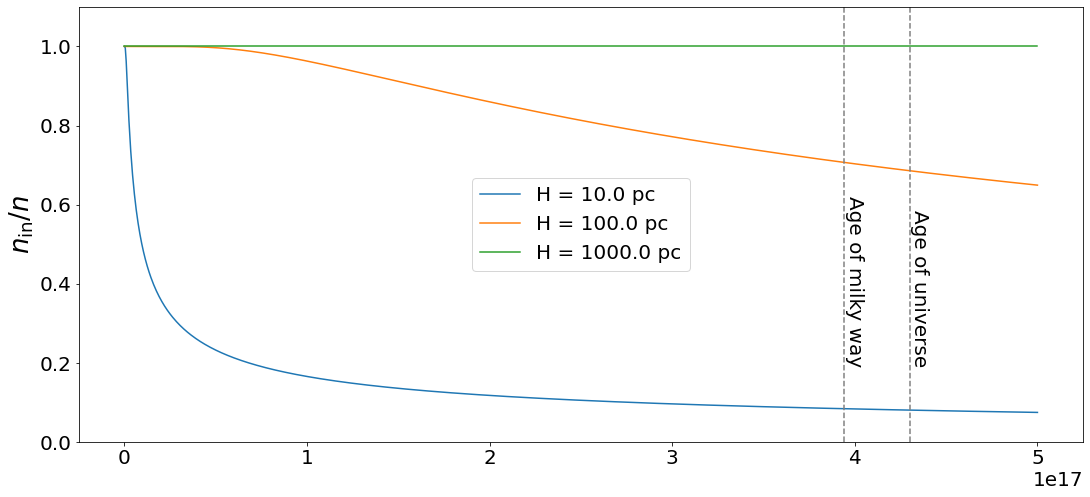

In [5]:
from scipy.special import erf

heights = np.logspace(1,3,3)
t0 = np.linspace(1,5e17,1000)

for H in heights:
    plt.plot(t0,erf(4.66525e6*H/np.sqrt(t0)),label=f"H = {H} pc")
    
plt.annotate("Age of universe",(4.302e17,0.2),rotation=-90)
plt.annotate("Age of milky way",(3.944e17,0.2),rotation=-90)
plt.ylabel(r"$n_\mathrm{in} / n$")
plt.axvline(4.3e17,ls="--",c="gray")
plt.axvline(3.942e17,ls="--",c="gray")
plt.ylim(0,1.1)
plt.legend()
plt.show()

#### (c) Ab welcher Energie können Teilchen (Protonen) die Galaxie verlassen? 

Nehmen Sie an, dass dazu nach $t=10^{14}$ s noch die Hälfte der ursprünglich freigesetzten Teilchen in diesem vereinfachten Modell innerhalb der Scheibe von $z<±H$ vorhanden ist. Sie können Ihr Ergebnis mit [[1](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1970MNRAS.147....1S&defaultprint=YES&filetype=.pdf)] vergleichen.

In [4]:
E = np.logspace(10,17,100)
data = erf(2.41373e11*1e3/np.sqrt(E*10e14))
E_min = E[np.argmin(np.abs(data-0.5))]

print(f"Minimale Energie zum Verlassen einer 1 kpc breiten Galaxie:  E_min = {E_min:.3e} eV")

Minimale Energie zum Verlassen einer 1 kpc breiten Galaxie:  E_min = 2.420e+14 eV


Zitat aus dem Paper (p.10): 

"particles with energies greater than a few times $10^{14}$ eV would be able to diffuse hundreds of parsecs across fieldlines, and could thus escape from the galactic disc relatively easily."

Also liegt mein Ergebnis ziemliche genau an dem, was im Paper erzählt wird. Hängt aber auch stark von der Dicke der Galaxie ab (ich habe 1 kpc verwendet)

# 13 Leaky-Box-Modell

Die Ausbreitung der kosmischen Strahlung kann durch folgende Transportgleichung beschrieben werden:

$$ \frac{\partial n_i}{\partial t} = \nabla D \nabla n_i + Q_i + \frac{\partial}{\partial E} (b_i(E)n_i) - \frac{n_i}{\tau_{\mathrm{spal},i}} - \frac{n_i}{\tau_{\mathrm{rad},i}} + \sum\limits_{j>i}\frac{p_{ij}}{\tau_j}n_i$$

#### (a)  Erklären Sie die Bedeutung der einzelnen Terme. $\\[10pt]$

##### 1. $\nabla D \nabla n_i \;\rightarrow$ Verluste durch Diffusion $\\[5pt]$
##### 2. $+\;Q_i \;\rightarrow$ Quellterme (Supernovae etc.) $\\[5pt]$
##### 3. $+\frac{\partial}{\partial E} (b_i(E)n_i)\;\rightarrow$ Energieverluste? Wieso das Vorzeichen? $\\[5pt]$
##### 4. $-\;\frac{n_i}{\tau_{\mathrm{spal},i}}\;\rightarrow$ Verluste durch Kernspallation $\\[5pt]$
##### 5. $-\;\frac{n_i}{\tau_{\mathrm{rad},i}}\;\rightarrow$ Verlust durch radioaktiven Zerfall $\\[5pt]$
##### 6. $+\sum\limits_{j>i}\frac{p_{ij}}{\tau_j}n_i\;\rightarrow$ Erzeugung von Kernen durch Spallation $\\[5pt]$

#### (b) Wie vereinfacht sich die Transportgleichung aus Gl. (3) für radioaktive und nichtradioaktive Isotope?

Für nichtradioaktive Isotope fällt Term 5. weg.

#### (c) Geben Sie das Verhältnis der Häufigkeit eines radioaktiven Isotops und eines nichtradioaktiven Isotops an.

Im Leaky-Box model herrscht Gleichgewicht ($\frac{\partial n_i}{\partial t}=0$) zwischen Erzeugung und Vernichtung, demnach müssen auch die einzelnen Beiträge im Gleichgewicht (also konstant) sein. Energieverluste sind vernachlässigt. Gleichung 3 vereinfacht sich:

$
\begin{aligned}
\hspace{13.8cm} 0 &= Q_i + C_i - \frac{n_i}{\tau_\mathrm{esc,i}} - \frac{n_i}{\tau_\mathrm{spal,i}} - \frac{n_i}{\tau_\mathrm{rad,i}} \\
\Longleftrightarrow\qquad n_i &= (Q_i + C_i)\cdot (1/\tau_\mathrm{esc,i} + 1/\tau_\mathrm{spal,i} + 1/\tau_\mathrm{rad,i})
\end{aligned}
$

Damit folgt für das Verhältnis zweier Isotope:

$$\frac{n_i}{n_j} = \underbrace{\frac{Q_i + C_i}{Q_j + C_j}}_\mathrm{Erzeugung}\cdot\underbrace{\frac{1/\tau_\mathrm{esc,i} + 1/\tau_\mathrm{spal,i} + 1/\tau_\mathrm{rad,i}}{1/\tau_\mathrm{esc,j} + 1/\tau_\mathrm{spal,j} + 1/\tau_\mathrm{rad,i}}}_\mathrm{Vernichtung}$$

Für nichtradioaktive Isotope vereinfacht sich das entsprechend nochmal. Gemäß Hinweis auf dem Blatt 
lassen sich auch Terme antiproportional zur Kernspallationszeit vernachlässigen.

# 14 Das Alter der galaktischen kosmischen Strahlung

#### (a) Berechnen Sie das Alter der galaktischen kosmischen Strahlung, aus dem Verhältnis der Häufigkeit von $^{10}\mathrm{Be}$ - und $^{9}\mathrm{Be}$-Kernen.

$^{9}$Be ist stabil, $\tau_\mathrm{rad,10}=1.5\cdot10^6\,\mathrm{a}$, $\tau_\mathrm{esc,10}=\tau_\mathrm{esc,9}$

$$\frac{n_{10}}{n_9} = \frac{Q_{10}+C_{10}}{Q_9+C_9}\cdot\frac{1/\tau_\mathrm{esc,10}}{1/\tau_\mathrm{esc,9}+1/\tau_\mathrm{rad,9}}= \frac{Q_{10}+C_{10}}{Q_9+C_9}\cdot\frac{1}{1+\frac{\tau_\mathrm{esc,10}}{\tau_\mathrm{rad,9}}}$$

$$\Leftrightarrow \tau_\mathrm{esc} = \left(\frac{n_9}{n_{10}}\frac{Q_{10}+C_{10}}{Q_9+C_9}-1\right)\cdot\tau_\mathrm{rad,9}$$

Dann folgt mit $\frac{C_{10}}{C_9}\approx10$, der Vernachlässigung anderer Quellprozesse und $\frac{n_{9}}{n_{10}}\approx\frac{0.341}{0.028}=12.1786$ folgt:

$$\tau_\mathrm{esc,10}=(12.1786\cdot 10-1)\cdot\tau_\mathrm{rad,10} = 181.2\cdot10^6\,\mathrm{a}$$

Dann folgt mit dem Ergebnis aus 12, dass $\tau_\mathrm{esc}$ eine Obergrenze für das Alter des Universums/der Milchstraße wäre:

$$\Longleftrightarrow\qquad\tau_\mathrm{Universe}\leq181.2\cdot10^6\,\mathrm{a}$$

Joa, fast.

#### (b) Fassen Sie die Analyse und das Ergebnis aus [[2](http://articles.adsabs.harvard.edu/pdf/1977ApJ...217..859G)] kurz zusammen.

Sehr viel Diskussion über verschiedene Modelle und Formen der Galaxie, Modulationen von CR, Beschleunigungsmechanismen etc. Am Ende kommt das hier raus:

| Likelihood | 7Be | 9Be | 10Be | Solar Modulation | Interstellar Density (atoms cm-3) | Cosmic-Ray Lifetime (years) |
|---|---|---|---|:---:|:---:|---:|
| Most likely composition | 0.631$\pm$0.024 | 0.341$\pm$0.023 | 0.028$\pm$0.014 | Standard model | 0.18(+0.18, -0.11) | 17(+24, -8)$\times10^6$ |
| Upper limit on systematic uncertainties | 0.630$\pm$0.026 | 0.324$\pm$0.023 | 0.046$\pm$0.022 | Standard model | 0.36(+0.48, -0.22) | 8.6(+14, -4.9)$\times10^6$ |
| Most likely composition | 0.631$\pm$0.024 | 0.341$\pm$0.023 | 0.028$\pm$0.014 | No modulation | 0.40(+0.43, -0.23) | 7.7(+11, -4.0)$\times10^6$ |

             

# 15 Neujahrsquiz

* Wie ist das Längenmaß Parsec ($3.1\cdot10^{16}$ m) definiert?
    * Entfernung in der eine Distanz von $1\,\mathrm{au}$ einer Parallaxe von einer Bogensekunde entspricht.
    
    
* Was bezeichnet Sgr. A*?
    * Radioquelle im Sternbild Schütze / Zentrum der Milchstraße.
    
    
* Welche Aussage impliziert das folgende Schaubild?
    * Enclosed mass bleibt mit schrumpfendem Radius konstant. $\rightarrow$ Sgr A* muss ein sehr kompaktes Objekt sein.
    

* Welches ist der der Erde am nächsten gelegene Stern? Welche ist die der Milchstraße am nächsten gelegene Galaxie?
    * Nächster Stern ist die Sonne.
    * Nächste (wirklich große) Galaxie [Andromeda](https://en.wikipedia.org/wiki/Andromeda_Galaxy)
    
    
* Warum entwickeln Galaxien Spiralarme?
    * Durch Dichtewellen, Drehimpulserhaltung.
    
    
* Was ist eine Redshift survey? Was bedeutet $z=0.158$ des Quasars 3C-273 [3] in diesem Zusammenhang?
    * Eine Redshift survey vermisst in einem Teil des Himmels die Rotverschiebung (i.e. Distanz) aller kosmischen Objekte 
    * Die Objekte müssen i.d.R. eine gewisse Erforderungen erfüllen (Helligkeit, etc.).
    * $z= \frac{\lambda_\mathrm{obs}}{\lambda_\mathrm{emit}}-1\qquad\Longleftrightarrow\qquad z=0.158\;\;\widehat{=}\;\;749$ Mpc
    
    
* Welche Teilchen finden Sie im Spektrum der kosmischen Strahlung bei $E=10^{10}$ eV?
    * Die Energieangabe verwirrt mich. Ist die Komposition nicht ungefähr isotrop über die Energie?
    * Ungefähr 89% Protonen, ungefähr 9% Alpha teilchen, 1% schwerere Nuklide und 1% $\beta$-Teilchen
    * EDIT: Nachdem ich Aufgabe 12 bearbeitet habe soll die Antwort hier vielleicht "Aus unserer Galaxie" lauten?
    
    
* Welche Materialien sind für Tscherenkow-Detektoren geeignet?
    * Kommt darauf an, was man messen möchte.
    * Je höher $n$, desto einfacher tritt Cherenkov-Strahlung auf.
    * Evtl. blöd, wenn man nur an den wirklich hochenergetischen Teilchen interessiert ist.
    * Andere Faktoren können ebenfalls eine Rolle spielen.
    * Beispiel HEAO-Experiment: möglichst leichtes Material, da auf einem Satteliten.
    


* Was sind mögliche Quellen der kosmischen Strahlung?
    * Supernovae (Fermi-Beschleunigung)
    * AGN, Quasare, GRBs (momentan alle noch unbestätigt, soweit ich gelesen habe)


* Zeigen Sie, dass für Luftschauer, die durch kosmische Strahlung ausgelöst werden gilt $X_\mathrm{max}\propto\log(E_\mathrm{prim}/\,\mathrm{eV}).$
    * Bereits in der letzten Übung gezeigt: $n_\mathrm{max} \propto \log\frac{E_\mathrm{prim}}{E_0}$
    * Schauermaximum im Heitler-Matthews-Modell bei $X_\mathrm{max} = n_\mathrm{max}X_0 \propto\log E_\mathrm{prim}\;/\;\mathrm{eV}.$